<a href="https://colab.research.google.com/github/KD4493/Assignmments/blob/master/bostonhouseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we will import necessary libraries

In [61]:
import pandas as pd
import numpy as np

Upload the dataset into notebook for model building

In [62]:
 from google.colab import files
 upload=files.upload()

Saving housing.csv to housing (1).csv


Reading the csv file using pandas 

In [63]:
import io
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(io.BytesIO(upload['housing.csv']),header=None, delimiter=r"\s+", names=column_names)

Let’s take a look at the top five rows using the DataFrame’s head() method

In [64]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Will use info() method to get a quick description of the data, in particular the
total number of rows, and each attribute’s type and number of non-null values

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We will have a look at summary of the numerical attributes.The describe() method is useful for that

In [66]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Also have a look at the histogram of data. It gives visualization effect of the data

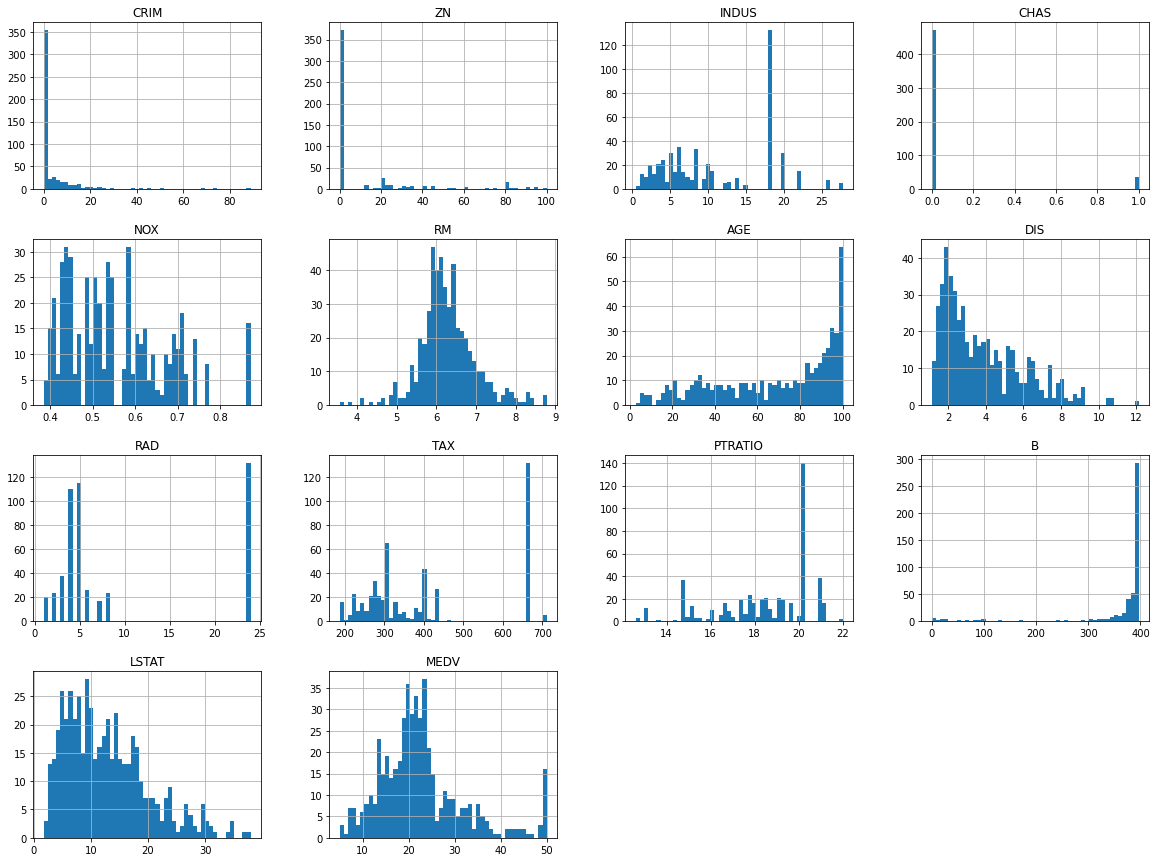

In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

Data needs to be splitted into train and test sets

In [68]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

We will check correlation coefficient value.Correlation Coefficient value always lies between -1 to +1. If correlation coefficient value is positive, then there is a similar and identical relation between the two variables. Else it indicates the dissimilarity between the two variables.
We will check correlation coefficient of all features with our target variable

In [70]:
corr_matrix = data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff08137ac50>,
      dtype=object)

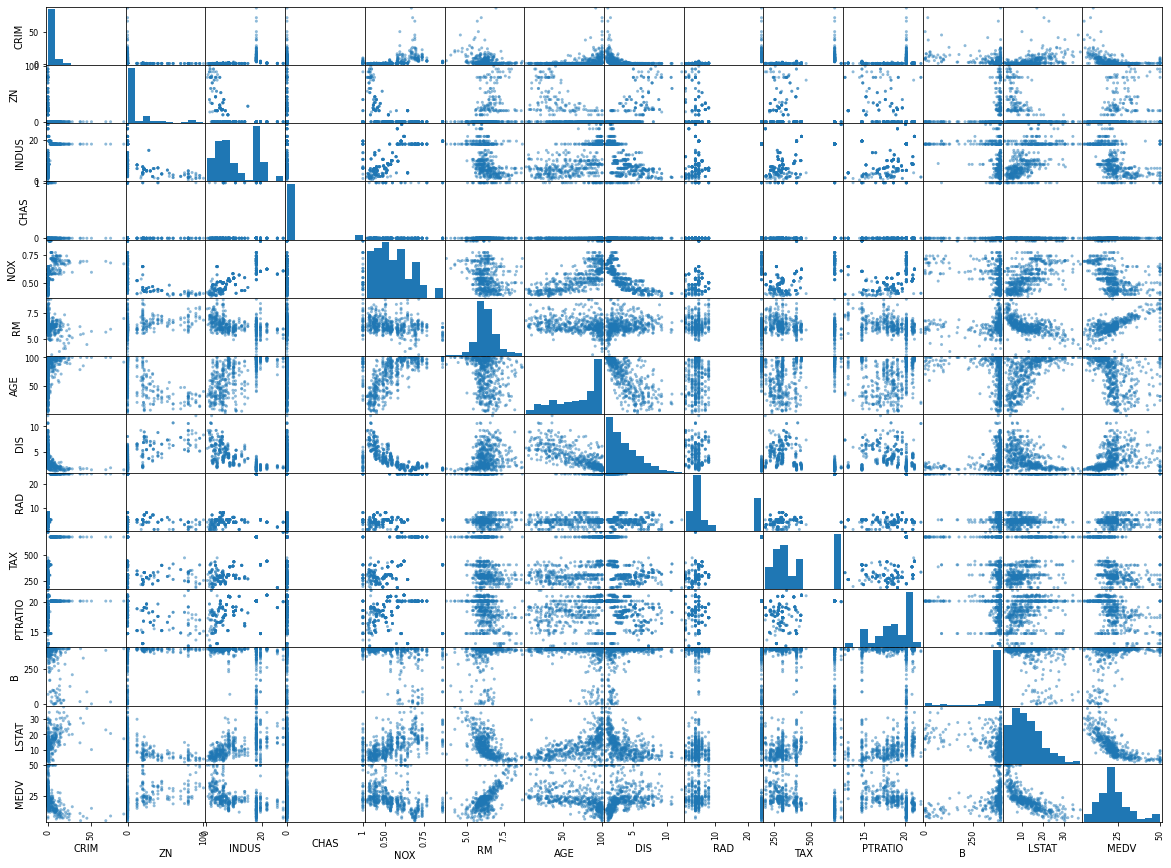

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,15))

Let's seprate the predictors and labels for Machine learning model

In [72]:
data_features = train_set.drop("MEDV", axis=1)
data_label = train_set['MEDV'].copy()

One of the most important transformations you need to apply to your data is feature scaling.Standardization is the approach of feature scaling.

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scaler = scaler.fit(data_features)
data_prepared = scaler.transform(data_features)

Now its time to check our first machine learning algorithm on our prepared data. We will check simple linear regression and see how it works.

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_label)

LinearRegression()

We now have a working Linear Regression model. Let’s try it out on a few
instances from the training set.

In [76]:
some_data = data_features.iloc[:5]
some_labels = data_label.iloc[:5]
scaler = scaler.fit(some_data)
some_data_prepared = scaler.transform(some_data)


In [77]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [12.02818014 24.77515644 33.11799785 20.72454218 23.33679665]


In [78]:
print("Labels:", list(some_labels))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


It works, although the predictions are not exactly accurate.Let’s measure this regression model’s RMSE on the whole training
set using Scikit-Learn’s mean_squared_error function:

In [79]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_label, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.6520331848801675

We have got rmse of 4.65, which is better if not best.Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data.

In [117]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_label)

DecisionTreeRegressor()

In [82]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_label, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

RMSE of 0.0 is practically not possible. It definitely indicates that model has badly overfit the data.We will check it using cross validation.

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, data_prepared, data_label,
        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [84]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [85]:
display_scores(tree_rmse_scores)

Scores: [3.67715425 4.06580025 4.41162544 6.75918526 6.06679487 3.54146862
 4.75270975 5.13193433 3.01740783 5.50649616]
Mean: 4.693057677884039
Standard deviation: 1.124836247314771


Now we got mean rmse score of 4.69 with std dev 1.12.We will use cross validation to linear regression and will check its scores

In [86]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_label,
            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]
Mean: 4.829441880454279
Standard deviation: 0.8896329730748535


Lets try Random forest regressor.Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further.

In [87]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_label)


RandomForestRegressor()

In [88]:
forest_scores = cross_val_score(forest_reg, df_scaled, data_label,
        scoring="neg_mean_squared_error", cv=10)


In [89]:
display_scores(forest_scores)

Scores: [ -9.68631056 -10.70123241  -6.15088007 -26.01486659 -23.45170485
  -7.892763   -14.84101507  -6.27085595  -6.62209975 -22.03460145]
Mean: -13.366632970914628
Standard deviation: 7.33152251527729


In [90]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
svm_reg = SVR()
svm_reg.fit(data_prepared, data_label)



SVR()

In [91]:
svr_scores = cross_val_score(forest_reg, df_scaled, data_label,
        scoring="neg_mean_squared_error", cv=10)
display_scores(svr_scores)

Scores: [ -9.40917795 -11.59590566  -6.20298166 -31.14891659 -22.81854163
  -8.14862062 -16.93006985  -6.9730807   -6.84780835 -19.47457785]
Mean: -13.954968085365849
Standard deviation: 7.954916355389836


Fine tuning of models

Uptil now the best performing models are linear regression and decision tree regressor. So for these two models we will find best parameters to train models and again check its scores.
Scikit learn's gridsearchcv method finds a great combination of hyperparameters values.

In [93]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linreg = GridSearchCV(lin_reg,parameters, cv=None)

In [94]:
grid_linreg.fit(data_prepared, data_label)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [95]:
grid_linreg.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [97]:
grid_linreg.best_estimator_

LinearRegression(normalize=False)

In [99]:
lin_reg_grid = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lin_reg_grid.fit(data_prepared, data_label)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [101]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg_grid.predict(data_prepared)
lin_mse = mean_squared_error(data_label, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.6520331848801675

After using gridsearch cv also we have same rmse from linear regressor.

In [112]:
test_features = test_set.drop("MEDV", axis=1)
test_label = test_set['MEDV'].copy()

In [113]:
scaler = scaler.fit(test_features)
test_prepared = scaler.transform(test_features)

In [115]:
test_predictions = lin_reg.predict(test_prepared)
test_mse = mean_squared_error(test_label, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse


5.235153893090182

In [118]:
test_predictions = tree_reg.predict(test_prepared)
test_mse = mean_squared_error(test_label, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

4.049969740869774

Summary of our models are:
Linear regression train score = 4.65
Linear regression test score = 5.23
Decision tree regressor train score = 4.69
Decision tree regressor test score = 4.04